# Climate component diagnostics

The inputs and outputs to the `ClimateComponent` are as follows:

## Inputs
| Parameter | Description | Units |
| --- | --- | --- |
| AREA [R] | Region area | km$^2$ |
| Y [I] | Analysis year (including $Y_0$, the baseline year) | year |
| SENS | Climate sensitivity for a doubling of CO$_2$ | °C |
| OCEAN | Half life of global response to increased forcing | year |
| FSLOPE | Slope of radiative forcing equation | W / m$^2$ |
| FT [I] | Total forcing | W / m$^2$ |
| FS [I, R] | Radiative forcing from sulphates | W / m$^2$ |

## Outputs
| Parameter | Description | Units |
| --- | --- | --- |
| ET [I] | Equilibrium temperature | °C |
| RT [I, R] | Realised temperature | °C |
| GRT [I] | Global realised temperature | °C |

The ClimateComponent computes global realized temperature as follows (from Hope, 2006, equations 19-21):
$$ET_{i,r} = \frac{SENS}{ln(2)} \frac{FT_i + FS_{i,r}}{FSLOPE}$$
$$RT_{i,r} = RT_{i-1,r} + \left(1 - e^\frac{Y_i - Y_{i-1}}{OCEAN}\right) (ET_{i,r} - RT_{i-1,r})$$
$$GRT_i = \frac{\sum_r RT_{i,r} AREA_r}{\sum_r AREA_r}$$

In [1]:
include("../src/climate_model.jl")

┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /Users/jrising/.julia/packages/Compose/wlPCt/src/Compose.jl:164


In [2]:
using Dates
df = getdataframe(m, :ClimateTemperature, :rt_g_globaltemperature)
df[:time] = Date.(df[:time])
df

,time,rt_g_globaltemperature
,Date,Float64⍰
1,2009-01-01,0.751085
2,2010-01-01,0.767377
3,2020-01-01,0.991085
4,2030-01-01,1.27184
5,2040-01-01,1.62232
6,2050-01-01,1.99298
7,2075-01-01,3.07071
8,2100-01-01,3.90181
9,2150-01-01,5.0993


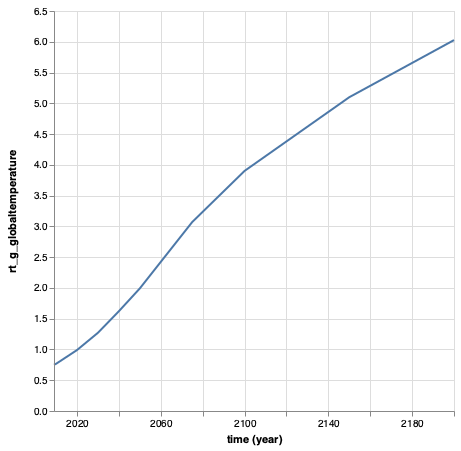

In [3]:
using VegaLite

df |> @vlplot(:line, x="year(time)", y=:rt_g_globaltemperature, width=400, height=400)